In [ ]:
!pip install bitdotio[psycopg2]
!pip install plotly-geo
!pip install geopandas
!pip install pyshp
!pip install shapely
!pip install gdown
!pip install geojson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Need help? Reach out to support@bit.io!
import bitdotio
import pandas as pd

# Check out https://github.com/bitdotioinc/python-bitdotio for more examples and documentation
client = bitdotio.bitdotio("v2_3vLxm_wBkwwvFabkFpR5CbfdQr4cC")


In [ ]:
# Run a query against one of your tables
''' query_result = client.query(query_string='SELECT * from "Casos_positivos_de_COVID-19_en_Colombia" LIMIT 10', fields={}, data=[])
print(query_result) '''
table = client.get_connection("allanosq/col_covid19")
cur = table.cursor()
cur.execute('SELECT * FROM "Casos_positivos_de_COVID-19_en_Colombia" ORDER BY "ID de caso" ASC LIMIT 1000000')
df = pd.DataFrame(cur)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,2020-03-06,1,2020-03-02,11,BOGOTA,11001,BOGOTA,19,1,F,...,380.0,ITALIA,Recuperado,2020-02-27,None,2020-03-06,2020-03-13,PCR,6,None
1,2020-03-09,2,2020-03-06,76,VALLE,76111,BUGA,34,1,M,...,724.0,ESPAÑA,Recuperado,2020-03-04,None,2020-03-09,2020-03-19,PCR,5,None
2,2020-03-09,3,2020-03-07,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,...,724.0,ESPAÑA,Recuperado,2020-02-29,None,2020-03-09,2020-03-15,PCR,6,None
3,2020-03-11,4,2020-03-09,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,...,NaN,None,Recuperado,2020-03-06,None,2020-03-11,2020-03-26,PCR,6,None
4,2020-03-11,5,2020-03-09,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,...,NaN,None,Recuperado,2020-03-08,None,2020-03-11,2020-03-23,PCR,6,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020-10-24,1000036,2020-10-17,18,CAQUETA,18001,FLORENCIA,83,1,M,...,NaN,None,Fallecido,2020-10-12,2020-11-04 00:00:00,2020-10-23,None,None,6,None
999996,2020-10-24,1000037,2020-10-15,76,VALLE,76001,CALI,23,1,M,...,NaN,None,Recuperado,2020-10-12,None,2020-10-15,2020-10-28,Tiempo,6,None
999997,2020-10-24,1000038,2020-10-15,25,CUNDINAMARCA,25290,FUSAGASUGA,54,1,M,...,NaN,None,Recuperado,2020-10-12,None,2020-10-23,2020-10-28,Tiempo,6,None
999998,2020-10-24,1000039,2020-10-19,76,VALLE,76001,CALI,37,1,M,...,NaN,None,Recuperado,2020-10-12,None,2020-10-23,2020-10-28,Tiempo,6,None


## Análisis Exploratorio de los datos
- Género
- Departamento
- Porcentaje de Recuperados V. Fallecidos
- Distribución de edades de contagiados
- Distribución edades de fallecidos


In [ ]:
df = df.rename(columns={0: 'Fecha de Reporte',
                        1:'Número de Caso', 
                        2:'Fecha de Notificación',
                        3:'Código de Departamento',
                        4:'Departamento',
                        5:'Código Municipal',
                        6:'Nombre de Municipio',
                        7:'Edad',
                        8:'Unidad de Medida de Edad',
                        9:'Género',
                        10:'Tipo de Contagio',
                        11:'Ubicación del Caso',
                        12:'Estado',
                        13:'Código del País',
                        14:'Nombre del País',
                        15:'Recuperado',
                        16:'Fecha de Inicio de Síntomas',
                        17:'Fecha de Muerte',
                        18:'Fecha de Diagnóstico',
                        19:'Fecha de Recuperación',
                        20:'Tipo de Recuperación',
                        21:'Pertenencia Étnica',
                        22:'Nombre del Grupo Étnico'
                        })


In [ ]:
df.drop(columns=["Código de Departamento",
                 "Código Municipal",
                 "Unidad de Medida de Edad",
                 "Ubicación del Caso",
                 "Código del País",
                 "Nombre del País"])

,Fecha de Reporte,Número de Caso,Fecha de Notificación,Departamento,Nombre de Municipio,Edad,Género,Tipo de Contagio,Estado,Recuperado,Fecha de Inicio de Síntomas,Fecha de Muerte,Fecha de Diagnóstico,Fecha de Recuperación,Tipo de Recuperación,Pertenencia Étnica,Nombre del Grupo Étnico
0,2020-03-06,1,2020-03-02,BOGOTA,BOGOTA,19,F,Importado,Leve,Recuperado,2020-02-27,None,2020-03-06,2020-03-13,PCR,6,None
1,2020-03-09,2,2020-03-06,VALLE,BUGA,34,M,Importado,Leve,Recuperado,2020-03-04,None,2020-03-09,2020-03-19,PCR,5,None
2,2020-03-09,3,2020-03-07,ANTIOQUIA,MEDELLIN,50,F,Importado,Leve,Recuperado,2020-02-29,None,2020-03-09,2020-03-15,PCR,6,None
3,2020-03-11,4,2020-03-09,ANTIOQUIA,MEDELLIN,55,M,Relacionado,Leve,Recuperado,2020-03-06,None,2020-03-11,2020-03-26,PCR,6,None
4,2020-03-11,5,2020-03-09,ANTIOQUIA,MEDELLIN,25,M,Relacionado,Leve,Recuperado,2020-03-08,None,2020-03-11,2020-03-23,PCR,6,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020-10-24,1000036,2020-10-17,CAQUETA,FLORENCIA,83,M,Comunitaria,Fallecido,Fallecido,2020-10-12,2020-11-04 00:00:00,2020-10-23,None,None,6,None
999996,2020-10-24,1000037,2020-10-15,VALLE,CALI,23,M,Comunitaria,Leve,Recuperado,2020-10-12,None,2020-10-15,2020-10-28,Tiempo,6,None
999997,2020-10-24,1000038,2020-10-15,CUNDINAMARCA,FUSAGASUGA,54,M,Relacionado,Leve,Recuperado,2020-10-12,None,2020-10-23,2020-10-28,Tiempo,6,None
999998,2020-10-24,1000039,2020-10-19,VALLE,CALI,37,M,Relacionado,Leve,Recuperado,2020-10-12,None,2020-10-23,2020-10-28,Tiempo,6,None


In [ ]:
df.columns

Index(['Fecha de Reporte', 'Número de Caso', 'Fecha de Notificación',
       'Código de Departamento', 'Departamento', 'Código Municipal',
       'Nombre de Municipio', 'Edad', 'Unidad de Medida de Edad', 'Género',
       'Tipo de Contagio', 'Ubicación del Caso', 'Estado', 'Código del País',
       'Nombre del País', 'Recuperado', 'Fecha de Inicio de Síntomas',
       'Fecha de Muerte', 'Fecha de Diagnóstico', 'Fecha de Recuperación',
       'Tipo de Recuperación', 'Pertenencia Étnica',
       'Nombre del Grupo Étnico'],
      dtype='object')

### Contagiados según género

In [ ]:
cuenta_genero = df['Género'].str.upper().value_counts()
genero = pd.DataFrame(data={"Número de Personas":cuenta_genero.values},
                  index=cuenta_genero.index)
genero

,Número de Personas
M,504473
F,495527


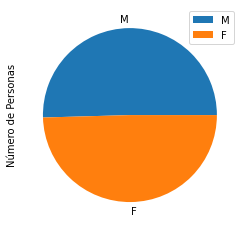

In [ ]:
genero.plot.pie(y="Número de Personas")


### Contagiados según departamento

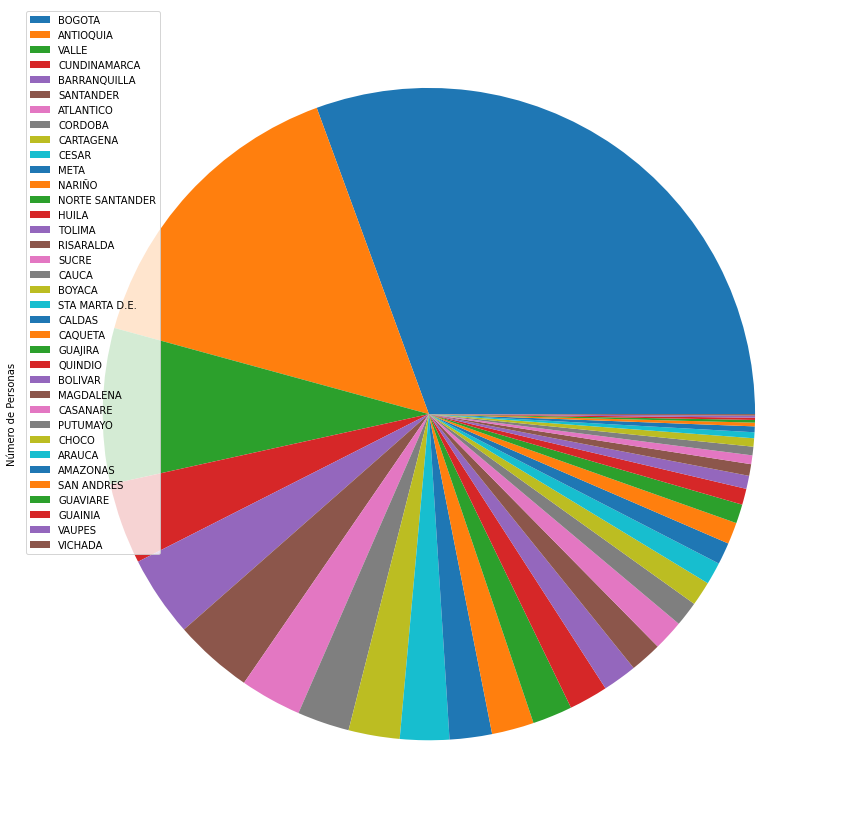

In [ ]:
cuenta_departamento = df['Departamento'].str.upper().value_counts()
departamento = pd.DataFrame(data={"Número de Personas":cuenta_departamento.values},
                  index=cuenta_departamento.index)
departamento.plot.pie(figsize=(15, 15),y="Número de Personas",labels=None)

### Comparación: Recuperados VS Fallecidos

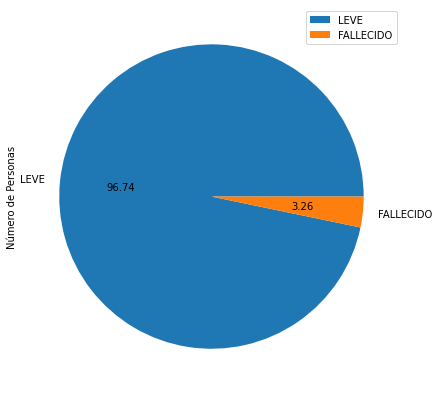

In [ ]:
cuenta_estado = df['Estado'].str.upper().value_counts()
estado = pd.DataFrame(data={"Número de Personas":cuenta_estado.values},
                  index=cuenta_estado.index)
estado.plot.pie(figsize=(7, 7),autopct='%.2f',y="Número de Personas")

### Distribución de edades para contagios

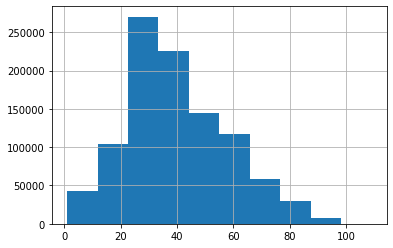

In [ ]:
df["Edad"].hist()

### Distribución de edades para fallecidos

In [ ]:
fallecidos = df[df["Estado"]=="Fallecido"]

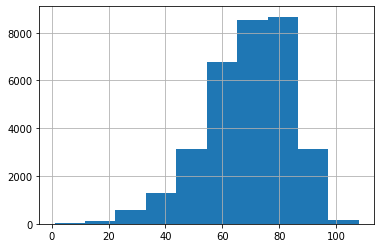

In [ ]:
fallecidos["Edad"].hist()

### Etnias

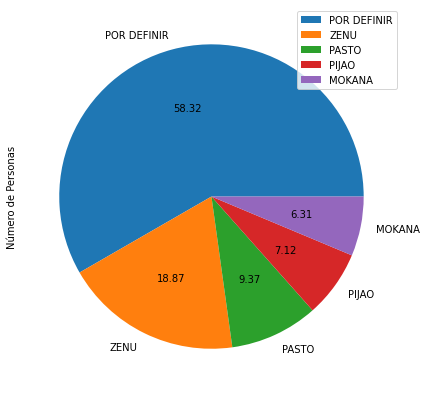

In [ ]:
cuenta_etnias = (df['Nombre del Grupo Étnico'].str.upper().value_counts()).head()
etnias = pd.DataFrame(data={"Número de Personas":cuenta_etnias.values},
                  index=cuenta_etnias.index)
etnias.plot.pie(figsize=(7, 7),autopct='%.2f',y="Número de Personas")

### Muertes por departamento

In [ ]:
import gdown
import json
url = 'https://drive.google.com/uc?id=1rhLbLZh50acVoZMnrTJGGZuDpO_pdqnB&export=download'
output = 'dpt.json'
gdown.download(url, output, quiet=False)
url = 'https://drive.google.com/uc?id=1pnfDNJIV34Nqe-a_B86f0M2RL0jfelNy&export=download'
output = 'mcp.json'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1rhLbLZh50acVoZMnrTJGGZuDpO_pdqnB&export=download
To: /content/dpt.json
100%|██████████| 3.50M/3.50M [00:00<00:00, 95.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pnfDNJIV34Nqe-a_B86f0M2RL0jfelNy&export=download
To: /content/mcp.json
100%|██████████| 13.2M/13.2M [00:00<00:00, 176MB/s]


'mcp.json'

In [ ]:
with open('/content/dpt.json', 'r') as response:
    dpts = json.load(response)

In [ ]:
deptf = df[['Departamento','Estado']].query('Estado == "Fallecido"')
deptf = deptf['Departamento'].value_counts()
departamento_fallecidos = pd.DataFrame({'Departamento':deptf.index, 'Fallecidos':deptf.values})
departamento_fallecidos

,Departamento,Fallecidos
0,BOGOTA,7898
1,ANTIOQUIA,3334
2,VALLE,2882
3,SANTANDER,1778
4,BARRANQUILLA,1726
5,CORDOBA,1642
6,ATLANTICO,1451
7,CUNDINAMARCA,1264
8,NORTE SANTANDER,1142
9,CESAR,826


In [ ]:
import plotly.express as px
import geojson

fig = px.choropleth_mapbox(departamento_fallecidos, geojson=dpts, locations='Departamento', color='Fallecidos',
                           range_color=(0, 7900),
                           mapbox_style="white-bg",
                           zoom=3, center = {"lat": 4.5, "lon": -74},
                           opacity=0.5
                          )
fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'))
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Infectados por departamento

In [ ]:
departamento_infectados = df['Departamento'].value_counts()
departamento_infectados = pd.DataFrame({'Departamento':departamento_infectados.index, 'Infectados':departamento_infectados.values})
departamento_infectados

,Departamento,Infectados
0,BOGOTA,305885
1,ANTIOQUIA,151576
2,VALLE,77099
3,CUNDINAMARCA,40190
4,BARRANQUILLA,40075
5,SANTANDER,39263
6,ATLANTICO,30444
7,CORDOBA,25854
8,CARTAGENA,25340
9,CESAR,24363


In [ ]:
import plotly.express as px
import geojson

fig = px.choropleth_mapbox(departamento_infectados, geojson=dpts, locations='Departamento', color='Infectados',
                           range_color=(752, 60000),
                           mapbox_style="white-bg",
                           zoom=3, center = {"lat": 4.5, "lon": -74},
                           opacity=0.5
                          )
fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'))
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Proporción entre infectados y muertos por departamento

In [ ]:
#Contagiados por departamentos
cuenta_departamento_infectados = df['Departamento'].value_counts()
departamento_infectados = pd.DataFrame(
    data={"Número de Infectados":cuenta_departamento_infectados.values},
    index=cuenta_departamento_infectados.index)

#Fallecidos por departamentos
cuenta_departamento_fallecidos = df[['Departamento','Estado']].query('Estado == "Fallecido"')['Departamento'].value_counts()
cuenta_departamento_fallecidos = pd.DataFrame(data={"Número de Fallecidos":x.values},
                                       index=cuenta_departamento_fallecidos.index)
#Hallamos proporcion por departamentos
joinProporcion = departamento_infectados.join(cuenta_departamento_fallecidos)
proporcion_departamento = joinProporcion['Número de Fallecidos']/joinProporcion['Número de Infectados']
proporcion_departamento.sort_values()
proporcion_departamento = pd.DataFrame({'Departamento':proporcion_departamento.index, 'Proporcion':proporcion_departamento.values})
proporcion_departamento.sort_values(by=["Proporcion"])

,Departamento,Proporcion
34,VAUPES,0.011928
35,VICHADA,0.015957
33,GUAINIA,0.017195
31,SAN ANDRES,0.019252
1,ANTIOQUIA,0.021996
32,GUAVIARE,0.022710
8,CARTAGENA,0.023402
18,BOYACA,0.025535
26,CASANARE,0.025753
10,META,0.025788


In [ ]:
fig = px.choropleth_mapbox(proporcion_departamento, geojson=dpts, locations='Departamento', color='Proporcion',
                           range_color=(0, 0.1),
                           mapbox_style="white-bg",
                           zoom=3, center = {"lat": 4.5, "lon": -74},
                           opacity=0.5
                          )
fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'))
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# ***Regresiones Lineales***

Primero, hagamos una evaluación gráfica de la propagación del virus en el país.

In [ ]:
from traitlets.traitlets import default
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

time_cases = df
df1 = pd.DataFrame({'Fecha de Reporte':time_cases['Fecha de Reporte'].drop_duplicates()})
df1 = df1.reset_index()
df1 = df1.drop(columns=["index"])
test = time_cases.groupby('Fecha de Reporte')['Fecha de Reporte'].value_counts().to_frame('Numero de Casos').values
df1['Numero de Casos'] = test
df1

,Fecha de Reporte,Numero de Casos
0,2020-03-06,1
1,2020-03-09,2
2,2020-03-11,6
3,2020-03-12,5
4,2020-03-13,5
...,...,...
226,2020-10-19,7561
227,2020-10-20,8570
228,2020-10-21,8671
229,2020-10-22,1058


In [ ]:
fig = px.bar(df1, x=df1['Fecha de Reporte'], y=df1['Numero de Casos'], title="Número de casos en función del tiempo")
fig.show()

In [ ]:
import numpy as np

X=df1.index.values[1:].astype(int)
Y=df1['Numero de Casos'].values[1:].astype(int)
a = np.inner(X,X)
b = np.sum(X)
c = np.inner(X,Y)
d = np.sum(Y)
N = len(X)
Delta = a*N-b*b
A =(N*c-b*d)/Delta
B =(a*d-b*c)/Delta
def Y_pred(xhat):
  
  return A*xhat+B

Y_hat = Y_pred(X)

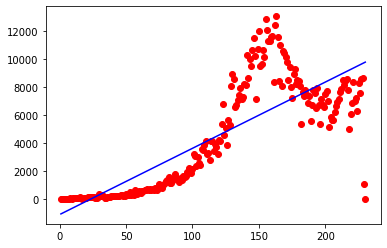

In [ ]:
plt.scatter(X, Y,color='red')
plt.plot(X, Y_hat, color='blue')
plt.show()

# ***Modelos matemáticos para el ajuste de la curva de contagio***

1. Modelo lineal
1. Modelo polinómico.
2. Modelo potencial.
3. Modelo exponencial.
4. Modelo Gaussiano.
5. Interpolación.
5. Máquinas con soporte vectorial.

La pregunta a responder es simple, ¿Cuál de los modelos anteriormente descritos se asemejan más a los datos reales? ¿Son estos modelos fiables a la hora de predecir comportamiento a futuro?

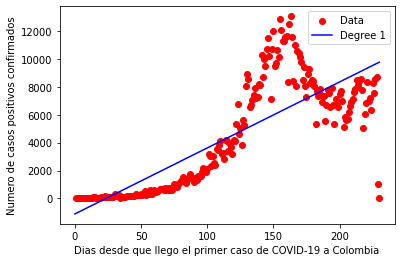

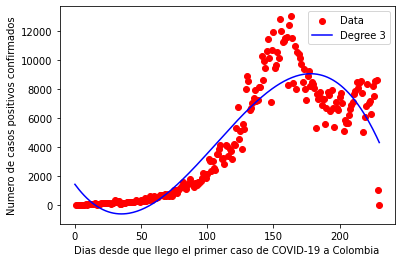

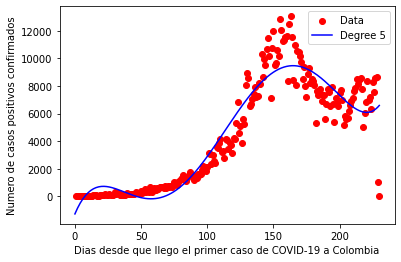

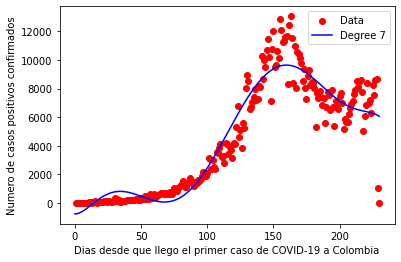

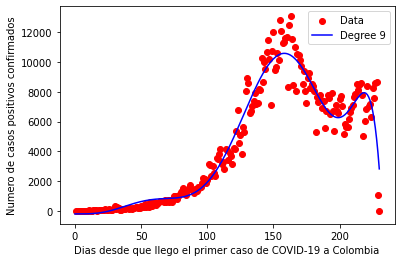

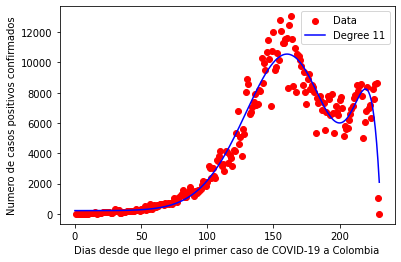

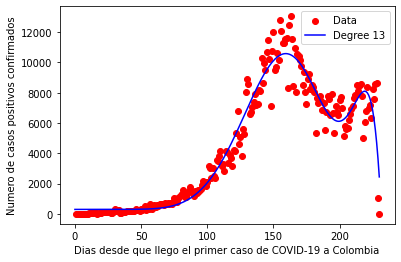

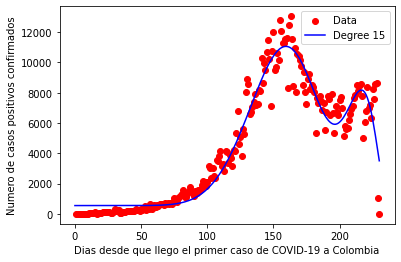

In [ ]:
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

# Regresion polinomial
def pol_reg(a):
  X_pol = df1.index.values.reshape(-1, 1) #Indexes representing the day of the first case, day 0 = 03/06/2020
  Y_pol = df1.iloc[:, 1].values.reshape(-1,1)

  X_train, X_test, Y_train, Y_test = train_test_split(X_pol, Y_pol, test_size=0.2, random_state=0)
  poly_reg = PolynomialFeatures(degree=a) # Probamos una regresion cubica
  X_poly = poly_reg.fit_transform(X_pol) # fit crea el modelo, transform aplica los cambios al modelo
  lin_reg_pol = LinearRegression()
  lin_reg_pol.fit(X_poly, Y_pol)

  plot_1 = plt.scatter(X, Y, color='red')
  plot_2, = plt.plot(X_pol, lin_reg_pol.predict(poly_reg.fit_transform(X_pol)), color='blue')
  plt.xlabel("Dias desde que llego el primer caso de COVID-19 a Colombia")
  plt.ylabel("Numero de casos positivos confirmados")
  plt.legend([plot_1, plot_2], ['Data', 'Degree ' + str(a)])
  plt.show(plot_1, plot_2)

odd_list = [1, 3, 5, 7, 9, 11, 13, 15]

for i in odd_list:
  pol_reg(i)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



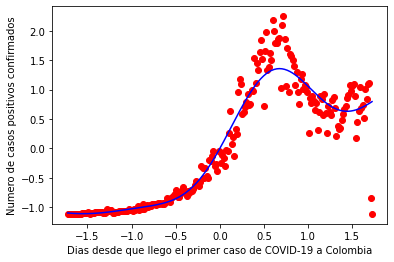

In [ ]:
# Support vector regression (SVR)

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

X_svr = df1.index.values.reshape(-1, 1) #Indexes representing the day of the first case, day 0 = 03/06/2020
Y_svr = df1.iloc[:, 1].values.reshape(-1,1)

# Al tenerlo transformado aumentamos la probabilidad de que el algoritmo funcione correctamente.
# AL tenerlo escalado, no habra tando desajuste entre el valor original y la prediccion de los
# datos que se estan utilizando en el modelo.

sc_X = StandardScaler()
sc_Y = StandardScaler()
X_svr = sc_X.fit_transform(X_svr)
Y_svr = sc_Y.fit_transform(Y_svr)

regression = SVR(kernel="rbf", epsilon = 0.001) #Kernel Gaussiano
regression.fit(X_svr, Y_svr)

y_pred = sc_Y.inverse_transform(regression.predict(sc_X.transform(X_svr)).reshape(-1,1))

# Prediccion del modelo usando SVR
plt.scatter(X_svr, Y_svr, color='red')
plt.plot(X_svr, regression.predict(X_svr), color='blue')
plt.xlabel("Dias desde que llego el primer caso de COVID-19 a Colombia")
plt.ylabel("Numero de casos positivos confirmados")
plt.show()





# ***Regresión múltiple***

Para la siguiente regresión múltiple, vamos a considerar el siguiente conjunto de factores: Edad, Tipo de contagio, Género y Tipo de recuperación. Para esta regresión, queremos determinar cual es el tiempo estimado que a una persona no fallecida le tomó recuperarse, la idea es así determinar cuál de los factores anteriormente mencionados tiene mayor influencia a la hora de hacer esta determinación.

In [ ]:
# Creamos el DataFrame con las personas que no fallecieron.
import datetime

mult = df[df['Recuperado'] == 'Recuperado']
mult = mult[mult['Fecha de Recuperación'] >= mult['Fecha de Reporte']]
filtered_mult = mult[['Fecha de Reporte', 'Fecha de Recuperación', 'Edad', 'Tipo de Contagio', 'Género', 'Tipo de Recuperación']]
filtered_mult.index = range(0, len(filtered_mult))
'''
#Determinar el conjunto de valores de alguna columna 
res = []
[res.append(x) for x in filtered_mult['Tipo de Contagio'] if x not in res]
print(str(res))
'''
filtered_mult['Tiempo de Recuperación'] = (filtered_mult['Fecha de Recuperación'] - filtered_mult['Fecha de Reporte']).dt.days
filtered_mult = filtered_mult.drop(columns=['Fecha de Reporte', 'Fecha de Recuperación'])
# filtered_mult = filtered_mult[filtered_mult['Tiempo de Recuperación'] <= 70]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Las variables Tipo de Contagio, Género y Tipo de Recuperación no son cuantitativas, de modo que debemos convertirlas en variables dummy.

In [ ]:
filtered_mult = pd.get_dummies(filtered_mult, columns=['Tipo de Contagio', 'Género', 'Tipo de Recuperación'])
filtered_mult

,Edad,Tiempo de Recuperación,Tipo de Contagio_Comunitaria,Tipo de Contagio_Importado,Tipo de Contagio_Relacionado,Género_F,Género_M,Tipo de Recuperación_PCR,Tipo de Recuperación_Tiempo
0,19,7,0,1,0,1,0,1,0
1,34,10,0,1,0,0,1,1,0
2,50,6,0,1,0,1,0,1,0
3,55,15,0,0,1,0,1,1,0
4,25,12,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...
960948,44,4,1,0,0,0,1,0,1
960949,23,4,1,0,0,0,1,0,1
960950,54,4,0,0,1,0,1,0,1
960951,37,4,0,0,1,0,1,0,1


In [ ]:
X_reg_mul = filtered_mult.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8]].values[:1000]
Y_reg_mul = filtered_mult.iloc[:, 1:2].values[:1000]
'''
labelencoder_X = LabelEncoder()
X_reg_mul[:, 1] = labelencoder_X.fit_transform(X_reg_mul[:, 1])
X_reg_mul[:, 2] = labelencoder_X.fit_transform(X_reg_mul[:, 2])
X_reg_mul[:, 3] = labelencoder_X.fit_transform(X_reg_mul[:, 3])
print(X_reg_mul)
ct_1 = ColumnTransformer(transformers=[("Tipo de Contagio", OneHotEncoder(), [1,2,3])], remainder='passthrough')
X_reg_mul = ct_1.fit_transform(X_reg_mul.tolist())
X_reg_mul = X_reg_mul[:, 1:]
'''
print(np.max(Y_reg_mul))
print(X_reg_mul)


418
[[19  0  1 ...  0  1  0]
 [34  0  1 ...  1  1  0]
 [50  0  1 ...  0  1  0]
 ...
 [75  0  0 ...  1  1  0]
 [33  0  0 ...  0  1  0]
 [37  0  1 ...  0  1  0]]


Teniendo las variables dummies creadas, procedemos a hacer el análisis de regresión múltiple.

In [ ]:
# Creamos la matrix de correlación entre las columnas de las matriz de datos

def tabular_corr_matrix(corr_mat):
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','correlación']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat = corr_mat.sort_values('correlación', ascending=False)
    return(corr_mat)

corr_matrix = filtered_mult.corr(method='pearson')
corr_table = tabular_corr_matrix(corr_matrix)
corr_table


,variable_1,variable_2,correlación
16,Tiempo de Recuperación,Tipo de Recuperación_PCR,0.339596
64,Tipo de Recuperación_PCR,Tiempo de Recuperación,0.339596
26,Tipo de Contagio_Comunitaria,Tipo de Recuperación_Tiempo,0.068372
74,Tipo de Recuperación_Tiempo,Tipo de Contagio_Comunitaria,0.068372
67,Tipo de Recuperación_PCR,Tipo de Contagio_Relacionado,0.065509
...,...,...,...
38,Tipo de Contagio_Relacionado,Tipo de Contagio_Comunitaria,-0.997079
51,Género_F,Género_M,-1.000000
59,Género_M,Género_F,-1.000000
71,Tipo de Recuperación_PCR,Tipo de Recuperación_Tiempo,-1.000000


Creamos ahora el mapa de calor para la matriz de correlaciones

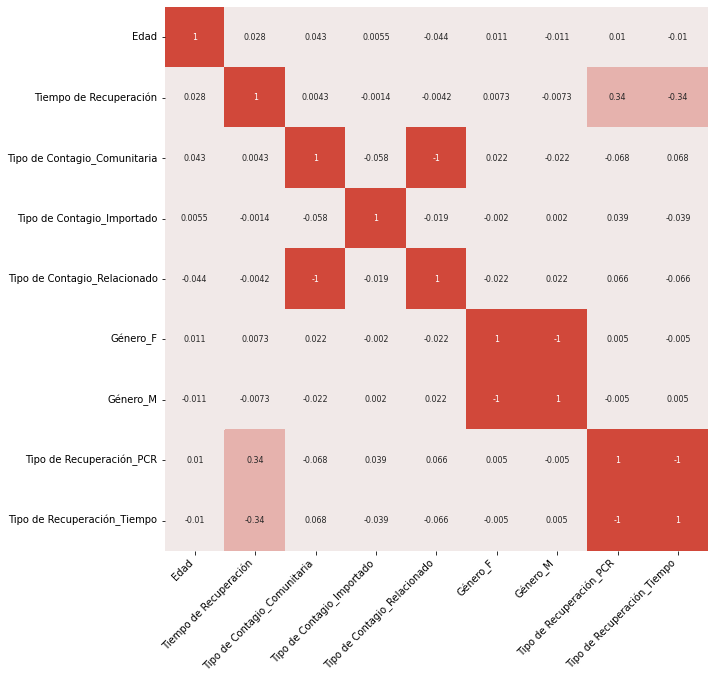

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(15, 15, n=20),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

Buscamos predecir el tiempo en base a los factores anteriormente mencionados, es decir

$Recuperación_{pred} = \beta_{0} + \beta_{1}\cdot Edad + \beta_{2}\cdot Contagio_{com} + \beta_{3}\cdot Contagio_{imp} + \beta_{4}\cdot Contagio_{rel} + \beta_{5}\cdot Género_{F} \qquad \qquad \qquad  + \beta_{6}\cdot Género_{M} + \beta_{7}\cdot Tipo_{pcr} + \beta_{8}\cdot Tipo_{tiempo} $

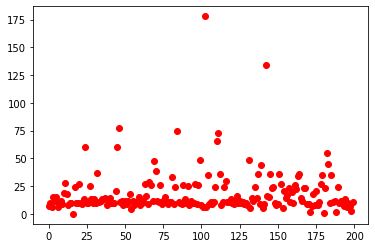

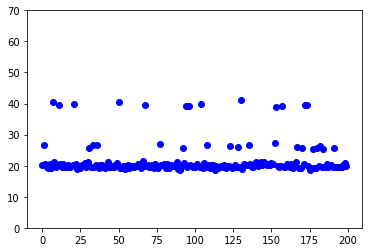


 Comparación después de hacer la eliminación de variables 



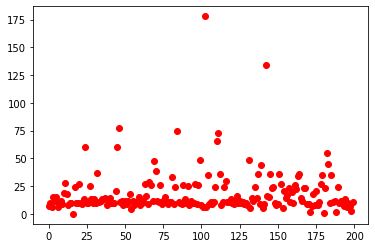

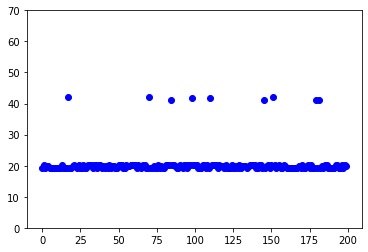

In [ ]:
import numpy as np
import statsmodels.api as sm

X_reg_mul_test = X_reg_mul

X_mul_train, X_mul_test, Y_mul_train, Y_mul_test = train_test_split(X_reg_mul_test, Y_reg_mul, test_size=0.2, random_state=0)

mul_regression = LinearRegression()
mul_regression.fit(X_mul_train, Y_mul_train)

# Prediccion del conjunto de resultados en el conjunto de testing

Y_mul_pred_le = mul_regression.predict(X_mul_test)
X_index = filtered_mult.index.values.reshape(-1,1)[:200]
new_test = Y_reg_mul[:200]

plt.scatter(X_index, new_test, color='red')
plt.show()

aut = plt.gca()
aut.set_ylim([0, 70])
aut = plt.scatter(X_index, Y_mul_pred_le, color='blue')
plt.show()

X_reg_mul_test = np.append(arr = np.ones((1000, 1)).astype(int), values = X_reg_mul_test, axis = 1)
SL = 0.05

# Eliminación de las variables menos representativas usando el criterio del p-value.

X_opt = X_reg_mul_test[:, [0, 1, 2, 3, 4, 5, 6, 7, 8]]
regression_OLS = sm.OLS(endog = Y_reg_mul, exog = X_opt).fit()
regression_OLS.summary()

X_opt = X_reg_mul_test[:, [0, 2, 3, 4, 5, 6, 7, 8]]
regression_OLS = sm.OLS(endog = Y_reg_mul, exog = X_opt).fit()
regression_OLS.summary()

X_opt = X_reg_mul_test[:, [0, 3, 4, 5, 6, 7, 8]]
regression_OLS = sm.OLS(endog = Y_reg_mul, exog = X_opt).fit()
regression_OLS.summary()

X_after = filtered_mult.iloc[:, [3, 4, 5, 6, 7, 8]].values[:1000]
X_mul_train_1, X_mul_test_1, Y_mul_train_1, Y_mul_test_1 = train_test_split(X_after, Y_reg_mul, test_size=0.2, random_state=0)

mul_regression_1 = LinearRegression()
mul_regression_1.fit(X_mul_train_1, Y_mul_train_1)

# Prediccion del conjunto de resultados en el conjunto de testing

Y_mul_pred_le_1 = mul_regression_1.predict(X_after)[:200]
X_index = filtered_mult.index.values.reshape(-1,1)[:200]

print("\n Comparación después de hacer la eliminación de variables \n")

plt.scatter(X_index, new_test, color='red')
plt.show()

aut = plt.gca()
aut.set_ylim([0, 70])
aut = plt.scatter(X_index, Y_mul_pred_le_1, color='blue')
plt.show()


In [ ]:
# Hallamos los coeficientes beta

Unos = np.ones(len(X_reg_mul))
X_reg_mul = np.insert(X_reg_mul, 0, Unos, axis=1)
MPenrouse = np.linalg.pinv(np.matmul(X_reg_mul.transpose(), X_reg_mul))
C = np.matmul(MPenrouse, X_reg_mul.transpose())
B = np.matmul(C, Y_reg_mul)

In [ ]:
B_test = B
for i in range(0, len(B_test)):
  print(B_test[i][0])

14.439089733615889
0.004455325310995944
12.708506313689384
0.09202823637623914
1.6385551835540233
6.295688212527573
8.14340152109047
-2.735421405657846
17.17451113927671


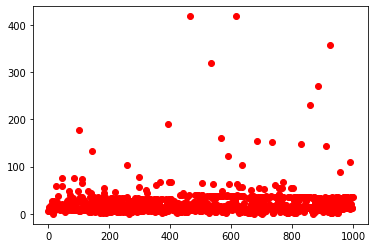

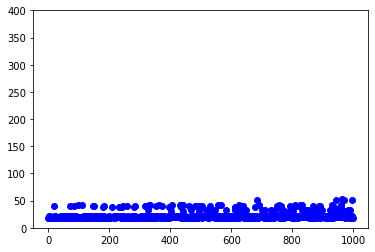

In [ ]:
X_index = filtered_mult.index.values.reshape(-1,1)[:1000]
Y_mul_pred = np.matmul(X_reg_mul, B)
plt.scatter(X_index, Y_reg_mul, color='red')
plt.show()
ax = plt.gca()
ax.set_ylim([0, 400])
ax = plt.scatter(X_index, Y_mul_pred, color='blue')
plt.show()

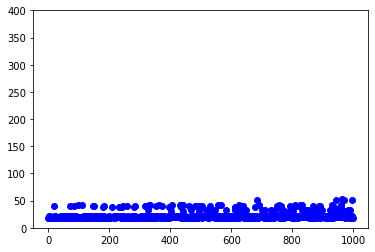

In [ ]:
def predict_values(a, b, c, d, e, f, g, h):
  return B_test[0][0] + B_test[1][0]*a + B_test[2][0]*b + B_test[3][0]*c + B_test[4][0]*d + B_test[5][0]*e + B_test[6][0]*f + B_test[7][0]*g + B_test[8][0]*h

Y_test_pred = predict_values(filtered_mult.iloc[:, 0].values[:1000], filtered_mult.iloc[:, 2].values[:1000], filtered_mult.iloc[:, 3].values[:1000], filtered_mult.iloc[:, 4].values[:1000], filtered_mult.iloc[:, 5].values[:1000], filtered_mult.iloc[:, 6].values[:1000], filtered_mult.iloc[:, 7].values[:1000], filtered_mult.iloc[:, 8].values[:1000])

aux = plt.gca()
aux.set_ylim([0, 400])
aux = plt.scatter(X_index, Y_test_pred, color='blue')
plt.show()

# ***Árbol de decisión***


**¿Qué tanto nos ayuda a decidir la mortalidad el tiempo D-S?**


Obteniendo el tiempo diágnostico-síntomas

In [ ]:
tiempo_ds = (df["Fecha de Diagnóstico"] - df["Fecha de Inicio de Síntomas"]).dt.days

Atributos con el cual predecir mortalidad
- Edad
- Género
- Tipo de Contagio
- Tiempo D-S

In [ ]:
atributos_arbol = df[["Edad","Género","Tipo de Contagio","Estado"]]
atributos_arbol["Tiempo D-S"] = tiempo_ds
atributos_arbol

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Edad,Género,Tipo de Contagio,Estado,Tiempo D-S
0,19,F,Importado,Leve,8.0
1,34,M,Importado,Leve,5.0
2,50,F,Importado,Leve,9.0
3,55,M,Relacionado,Leve,5.0
4,25,M,Relacionado,Leve,3.0
...,...,...,...,...,...
999995,83,M,Comunitaria,Fallecido,11.0
999996,23,M,Comunitaria,Leve,3.0
999997,54,M,Relacionado,Leve,11.0
999998,37,M,Relacionado,Leve,11.0


Quitar datos NaN

In [ ]:
atributos_arbol = atributos_arbol.mask(atributos_arbol.eq('None')).dropna()

In [ ]:
atributos_arbol["Género"] = atributos_arbol["Género"].astype('category').cat.codes
atributos_arbol["Tipo de Contagio"] = atributos_arbol["Tipo de Contagio"].astype('category').cat.codes
atributos_arbol["Estado"] = atributos_arbol["Estado"].astype('category').cat.codes

In [ ]:
atributos_arbol

,Edad,Género,Tipo de Contagio,Estado,Tiempo D-S
0,19,0,1,1,8.0
1,34,1,1,1,5.0
2,50,0,1,1,9.0
3,55,1,2,1,5.0
4,25,1,2,1,3.0
...,...,...,...,...,...
999995,83,1,0,0,11.0
999996,23,1,0,1,3.0
999997,54,1,2,1,11.0
999998,37,1,2,1,11.0


### Construyendo el árbol de decisión con Scikit 
- Dividir entre variables predictoras y objetivo
- Dividir los datos para entrenamiento y prueba

In [ ]:
target_variable = "Estado"
predictor_variables = ["Edad","Género", "Tipo de Contagio","Tiempo D-S"]
X = atributos_arbol[predictor_variables]
Y = atributos_arbol[target_variable]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

- Creación del árbol de decisión usando el coeficiente Gini

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='gini')

- Entrenando el árbol
- Se hacen una predicción de los datos de prueba

In [ ]:
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

- Precisión de la predicción

In [ ]:
clf.score(X_test,y_test)

0.9636837484911664

- Importancia de cada atributo de acuerdo al coeficiente Gini

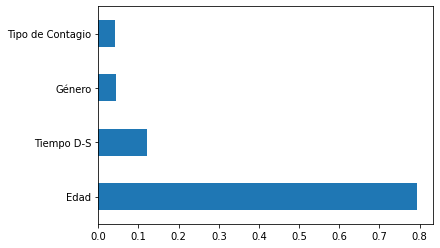

In [ ]:
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=predictor_variables)
feature_importances.nlargest(10).plot(kind='barh')


**Con 500 datos**

Limitemos el número de los datos un poquito ;)


In [ ]:
X = X.iloc[:500]
Y = Y.iloc[:500]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='gini')
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

Precisión con 500 datos

In [ ]:
clf.score(X_test,y_test)

0.91

- Importancia de los atributos

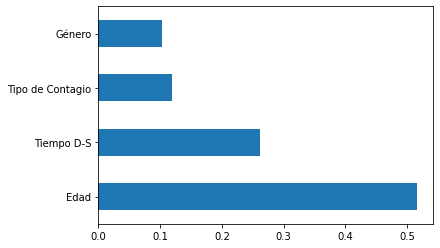

In [ ]:
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=predictor_variables)
feature_importances.nlargest(10).plot(kind='barh')

- Árbol de decisión

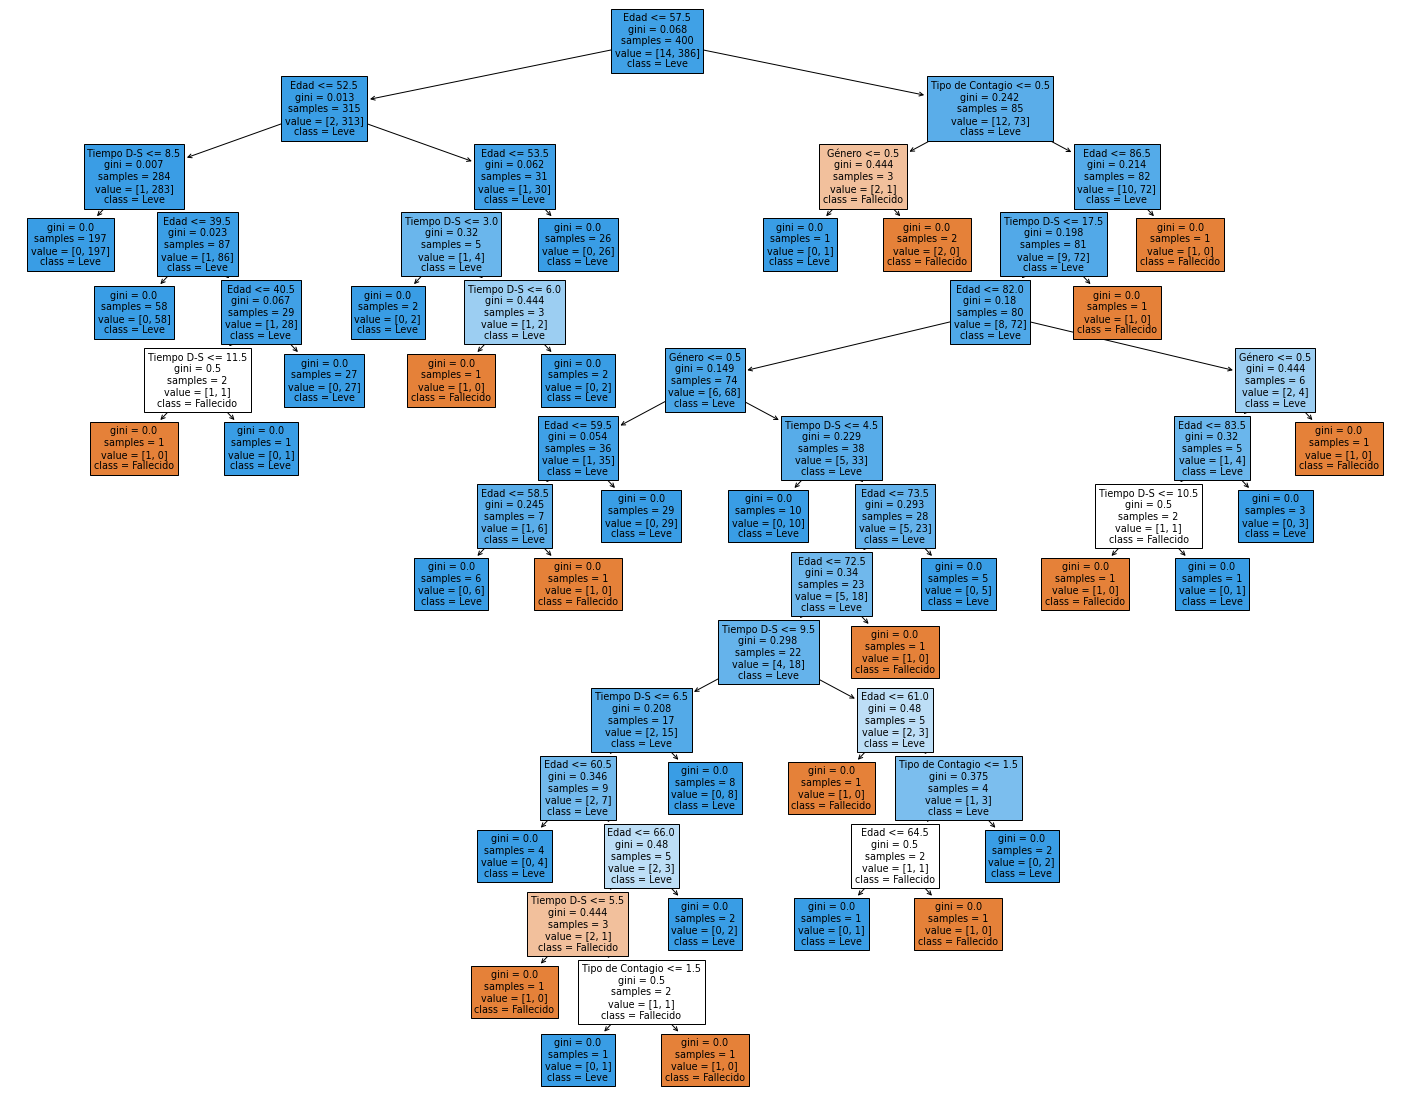

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTree, 
                   feature_names=DTree.feature_names_in_,  
                   class_names=["Fallecido","Leve"],
                   filled=True)